# Getting Started

In [3]:
import pandas as pd

movies = pd.read_csv("fandango_score_comparison.csv")
movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde2b2dcba8>]], dtype=object)

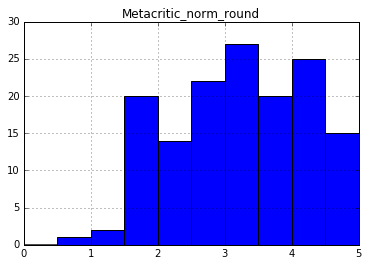

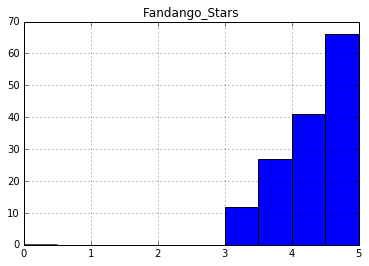

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

movies.hist("Metacritic_norm_round",bins=10,range=(0,5))
movies.hist("Fandango_Stars",bins=10,range=(0,5))

# Metacritic vs Fandango - Histogram
It's clear from the graphs above that Fandango is much more skewed (negatively) and presents a much higher average rating.
No movie has been evaluated bellow 3 points in Fandango website.}

In [17]:
import numpy as np

fand_mean = movies["Fandango_Stars"].mean()
meta_mean = movies["Metacritic_norm_round"].mean()

fand_median = movies["Fandango_Stars"].median()
meta_median = movies["Metacritic_norm_round"].median()

fand_std = np.std(movies["Fandango_Stars"])
meta_std = np.std(movies["Metacritic_norm_round"])

fand_meta_stats = pd.DataFrame({"Review Service":["Fandango","Metacritic"],
                   "Mean":[fand_mean,meta_mean],
                   "Median":[fand_median,meta_median],
                   "Std Dev":[fand_std,meta_std]})

fand_meta_stats

,Mean,Median,Review Service,Std Dev:
0,4.089041,4.0,Fandango,0.538532
1,2.972603,3.0,Metacritic,0.987561


# Metacritic vs Fandango - Metrics
Comparing to Metacritics, Fandango has higher mean and median reviews and a lower standard deviation. 
This means that not only the scores are, in average, higher, but also that data is more concentrated around the median (low occurences of low reviews).

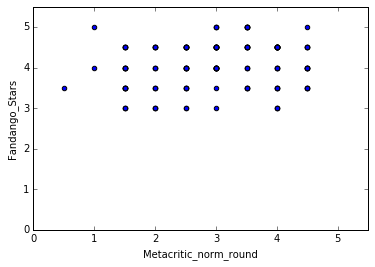

In [23]:
movies.plot.scatter(x="Metacritic_norm_round",y="Fandango_Stars",xlim=(0,5.5),ylim=(0,5.5))

In [26]:
movies["fm_diff"] = np.absolute((movies["Fandango_Stars"]-movies["Metacritic_norm_round"]))
movies.sort_values(by="fm_diff",ascending=False).head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


In [32]:
import scipy.stats as st

r,p = st.pearsonr(movies["Metacritic_norm_round"],movies["Fandango_Stars"])
print("r value = {:.6f}\np value = {:.6f}".format(r,p))

r value = 0.178449
p value = 0.031162


# Metacritic vs Fandango - r value
The r value indicates that the two review services are high independent from each other (a higher rating on one of them doesn't mean that the other is likely to have a higher rating as well)

In [34]:
m,b,r,p,std = st.linregress(movies["Metacritic_norm_round"],movies["Fandango_Stars"])
print("Prediction for review in Fandango of movies with 3.0 stars on Metacritic = {:.2f}".format(3.0*m+b))

Prediction for review in Fandango of movies with 3.0 stars on Metacritic = 4.09


In [ ]:
pred_1 = 1.0*m+b
pred_5 = 5.0*m+b
ax = movies.plot.scatter(x="Metacritic_norm_round",y="Fandango_Stars",xlim=(0,5.5),ylim=(0,5.5))
x = [1.0, 5.0]
y = [pred_1, pred_5]
ax.plot(x,y)